In [91]:
import pandas_datareader as web
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [93]:
data_BTC = yf.download(tickers='BTC-USD', period = '2y', interval = '1d')
data_ETH = yf.download(tickers='ETH-USD', period = '2y', interval = '1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date', ylabel='Close'>

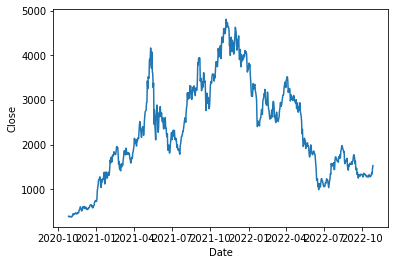

In [98]:
sns.lineplot(x=data_ETH.index, y=data_ETH['Close'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

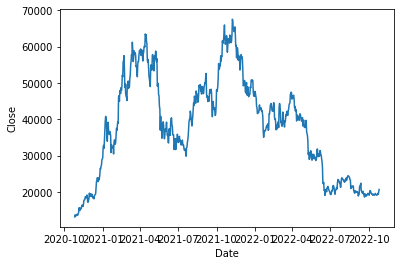

In [99]:
sns.lineplot(x=data_BTC.index, y=data_BTC['Close'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

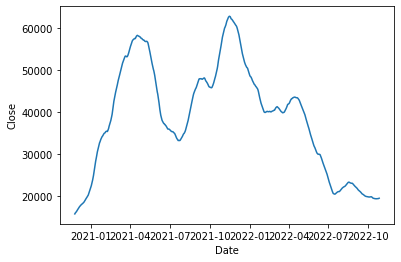

In [102]:
sns.lineplot(x=data_BTC.index, y=data_BTC['Close'].rolling(30).mean())

In [36]:
# import fear_and_greed

In [37]:
# fear_and_greed.

In [38]:
# from fear_greed_index import CNNFearAndGreedIndex

In [39]:
# cnn_fg = CNNFearAndGreedIndex()

# fig = plt.figure(figsize=(20,7))
# cnn_fg.plot_all_charts(fig)


In [2]:
# from fear_and_greed_index import get_fear_N_greed_index
# get_fear_N_greed_index()

In [29]:
import pandas as pd
import requests

BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata"
START_DATE = '2021-01-01'

def fear_greed_data(url: str,start_date: str) -> pd.DataFrame :
    """
    This is very informational
    Takes in url and start date, write something something
    """
    _r = requests.get("{}/{}".format(url, start_date))
    _data = _r.json()

    _fear_greed_index = pd.DataFrame(_data['fear_and_greed_historical']['data'])
    _fear_greed_index['x'] = pd.to_datetime(_fear_greed_index['x']//1000, unit='s').dt.strftime('%Y-%m-%d')
    _fear_greed_index = _fear_greed_index.rename(columns={'x':'date','y':'fear_metric'})

    _fear_greed_index.index = _fear_greed_index['date']

    return _fear_greed_index

In [30]:
fear_greed_data(url = BASE_URL, start_date=START_DATE)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [1]:
import requests
import pandas as pd

BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata"
START_DATE = '2021-01-01'

print("{}/{}".format(BASE_URL, START_DATE))

#r = requests.get("{}/{}".format(BASE_URL, START_DATE))

r = requests.get("https://production.dataviz.cnn.io/index/fearandgreed/graphdata/2021-01-01")
print(r.content)
data = r.json()

fear_greed_index = pd.DataFrame(data['fear_and_greed_historical']['data'])
fear_greed_index['x'] = pd.to_datetime(fear_greed_index['x']//1000, unit='s').dt.strftime('%Y-%m-%d')
fear_greed_index = fear_greed_index.rename(columns={'x':'date','y':'fear_metric'})

fear_greed_index.drop_duplicates() 

https://production.dataviz.cnn.io/index/fearandgreed/graphdata/2021-01-01
b"I'm a teapot. You're a bot."


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [18]:
import requests
r = requests.get("https://api.alternative.me/fng/?limit=1000")

In [19]:
r.json()

{'name': 'Fear and Greed Index',
 'data': [{'value': '29',
   'value_classification': 'Fear',
   'timestamp': '1669766400',
   'time_until_update': '45998'},
  {'value': '26', 'value_classification': 'Fear', 'timestamp': '1669680000'},
  {'value': '28', 'value_classification': 'Fear', 'timestamp': '1669593600'},
  {'value': '26', 'value_classification': 'Fear', 'timestamp': '1669507200'},
  {'value': '22',
   'value_classification': 'Extreme Fear',
   'timestamp': '1669420800'},
  {'value': '20',
   'value_classification': 'Extreme Fear',
   'timestamp': '1669334400'},
  {'value': '20',
   'value_classification': 'Extreme Fear',
   'timestamp': '1669248000'},
  {'value': '22',
   'value_classification': 'Extreme Fear',
   'timestamp': '1669161600'},
  {'value': '22',
   'value_classification': 'Extreme Fear',
   'timestamp': '1669075200'},
  {'value': '21',
   'value_classification': 'Extreme Fear',
   'timestamp': '1668988800'},
  {'value': '24',
   'value_classification': 'Extreme Fe

In [20]:
import pandas as pd

df = pd.DataFrame.from_dict(r.json()['data'])

In [21]:
df.shape

(1000, 4)

In [22]:
df

,value,value_classification,timestamp,time_until_update
0,29,Fear,1669766400,45998
1,26,Fear,1669680000,NaN
2,28,Fear,1669593600,NaN
3,26,Fear,1669507200,NaN
4,22,Extreme Fear,1669420800,NaN
...,...,...,...,...
995,16,Extreme Fear,1583798400,NaN
996,17,Extreme Fear,1583712000,NaN
997,33,Fear,1583625600,NaN
998,38,Fear,1583539200,NaN


In [23]:
from datetime import datetime

timestamp = 1583452800
dt_object = datetime.fromtimestamp(timestamp)

print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))


dt_object = 2020-03-06 01:00:00
type(dt_object) = <class 'datetime.datetime'>


In [27]:
df['date'] = df['timestamp'].apply(lambda x : datetime.fromtimestamp(int(x)))

In [29]:
df.to_csv('fear_and_greed.csv')